<a href="https://colab.research.google.com/github/Jagadeesh1406/codingrajatasks_-/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub

from PIL import Image
from PIL import ImageOps
from skimage import io
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import requests


In [17]:
module_handle = "https://tfhub.dev/google/aiy/vision/classifier/food_V1/1"
labelmap_url = "https://www.gstatic.com/aihub/tfhub/labelmaps/aiy_food_V1_labelmap.csv"

In [18]:
m = hub.KerasLayer(module_handle)

model = hub.load(module_handle)


In [19]:
# take a look at the available signatures for this particular model
model.signatures.keys()

KeysView(_SignatureMap({'image_classifier': <ConcreteFunction () -> Dict[['logits', TensorSpec(shape=(1, 2024), dtype=tf.float32, name=None)]] at 0x7ADE15797010>, 'default': <ConcreteFunction () -> Dict[['default', TensorSpec(shape=(1, 2024), dtype=tf.float32, name=None)]] at 0x7ADE1559BAC0>}))

In [20]:
print(hub.load(module_handle).signatures.keys())

KeysView(_SignatureMap({'image_classifier': <ConcreteFunction () -> Dict[['logits', TensorSpec(shape=(1, 2024), dtype=tf.float32, name=None)]] at 0x7ADE1556BB80>, 'default': <ConcreteFunction () -> Dict[['default', TensorSpec(shape=(1, 2024), dtype=tf.float32, name=None)]] at 0x7ADE1551FAF0>}))


In [21]:
classes = list(pd.read_csv(labelmap_url)["name"])
len(classes)

2024

In [22]:
classes[0:10]

['__background__',
 'Chaudin',
 'Bambalouni',
 'Ghoriba',
 'Mango sticky rice',
 'Jianbing',
 'Aguachile',
 'Carrozza',
 'Miyan kuka',
 'Efo riro']

In [23]:
input_shape = (224, 224)

In [24]:
def run_detector(image_url):

  im = Image.open(requests.get(image_url, stream=True).raw)
  plt.figure(figsize=(15, 15))
  plt.imshow(im)
  plt.show()

  image = np.asarray(io.imread(image_url), dtype="float")
  image = cv2.resize(image, dsize=input_shape, interpolation=cv2.INTER_CUBIC)

In [ ]:
image = image / image.max()

In [ ]:
 images = np.expand_dims(image, 0)

In [ ]:
output = m(images)
predicted_index = output.numpy().argmax()
classes = list(pd.read_csv(labelmap_url)["name"])
print(f"Prediction: {classes[predicted_index]}")

max_value = np.max(output.numpy())
print(f"Probability: {max_value}")


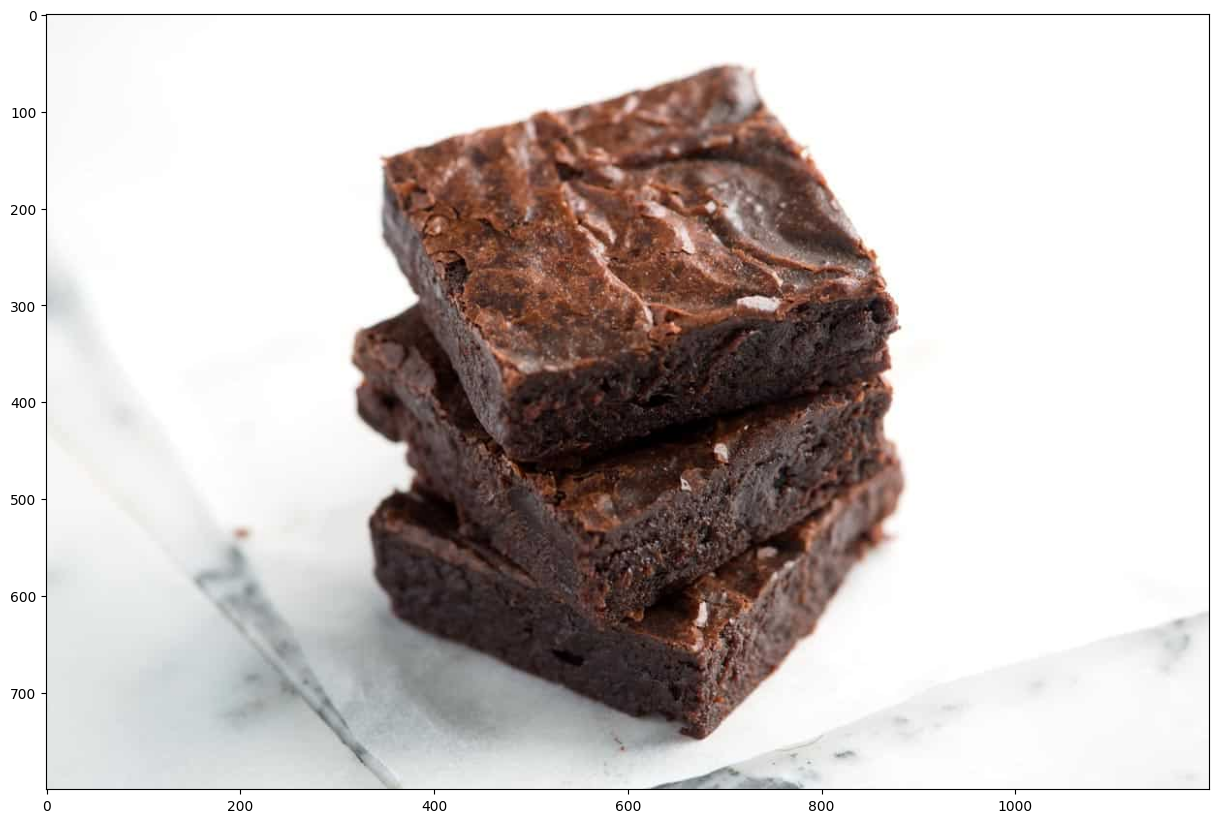

In [14]:
cake_url = "https://www.inspiredtaste.net/wp-content/uploads/2022/11/Easy-Fudgy-Brownies-Recipe-2-1200.jpg"

run_detector(cake_url)

In [26]:
from datetime import datetime
print(f"Changes have been made to the project on {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

Changes have been made to the project on 2024-04-01 09:53:34
